In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import os

import matplotlib.pyplot as plt
%matplotlib inline

cwd = os.getcwd()

dir_as_list = cwd.split('/')
base_path=''
go = True
i=0
while go:
    base_path= base_path+dir_as_list[i]+'/'
    if dir_as_list[i]=='research':
        go = False
    i=i+1
    
#graph_rel_path = "sample-graphs/sourcecred_sourcecred.json"
infra_rel_path = "infra"

#graph_abs_file_path = os.path.abspath(os.path.join(base_path, graph_rel_path))
infra_abs_path = os.path.abspath(os.path.join(base_path, infra_rel_path))

os. chdir(infra_abs_path)
import page_ranker as pr
import import_graph as ig
import inspect_subgraph as isg
os. chdir(cwd)

In [2]:
r=2
h=4

In [3]:
outtree = nx.balanced_tree(r,h, create_using=nx.MultiDiGraph)

G = nx.MultiDiGraph()
for e in outtree.edges:
    G.add_edge(e[1],e[0])
    
nx.set_node_attributes(G,'vanilla', 'type')
nx.set_edge_attributes(G,'vanilla', 'type')

In [4]:
G.nodes[0]

{'type': 'vanilla'}

In [5]:
G.edges[(1,0,0)]

{'type': 'vanilla'}

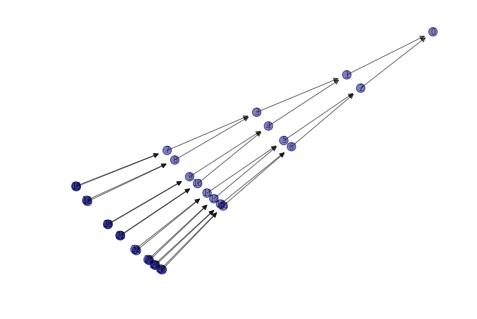

In [6]:
isg.inspectSubGraph(G, G.nodes, expand=False, verbose=False, label=True,pos = "kk")

In [7]:
alpha = .1
iterations = 50

seed = {n:1/len(G.nodes) for n in G.nodes}
#seed = {n:0 for n in G.nodes}
#seed[0] =1

node_wt_by_type = {'vanilla': 1}
edge_wt_by_type = {'vanilla': (1,1/2)}

self_loop_wt= 1

In [8]:
r, df, g = pr.pageRanker(G,
                         alpha,
                         iterations,
                         seed=seed,
                         initial_value = seed,
                         lazy=True, #try this one without lazy; its crazy!
                         self_loop_wt=self_loop_wt, 
                         node_wt_by_type =node_wt_by_type,
                         edge_wt_by_type=edge_wt_by_type)

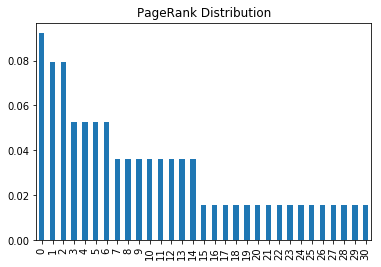

In [9]:
df.tail(1).T.plot(kind='bar',legend=False, title='PageRank Distribution')

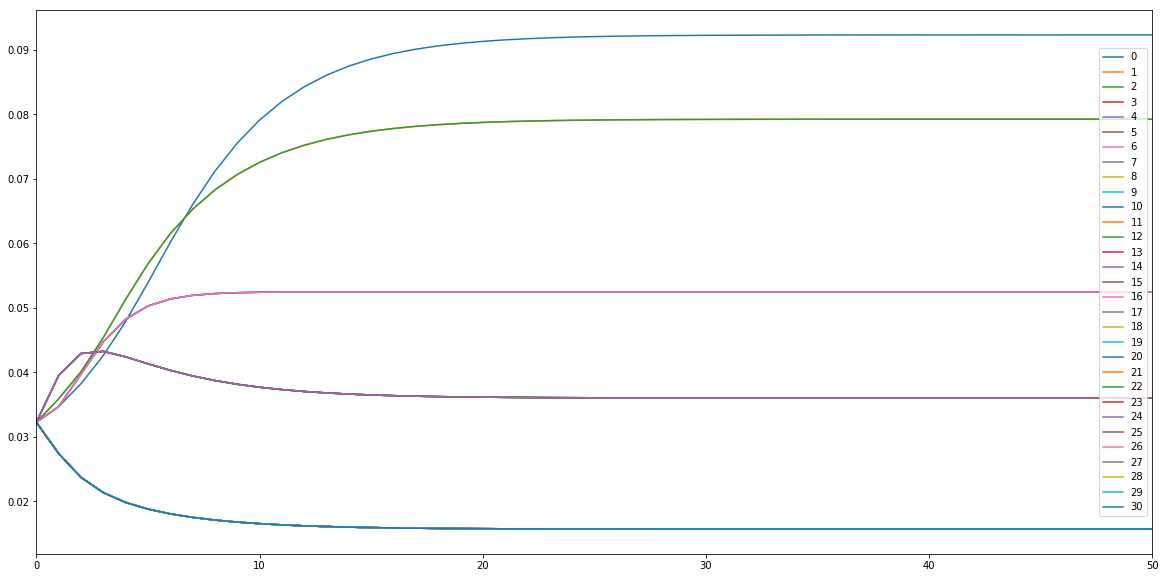

In [10]:
df.plot( figsize=(20,10))

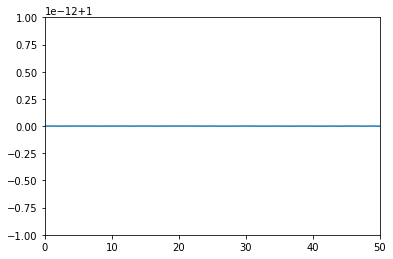

In [11]:
df.sum(axis=1).plot()

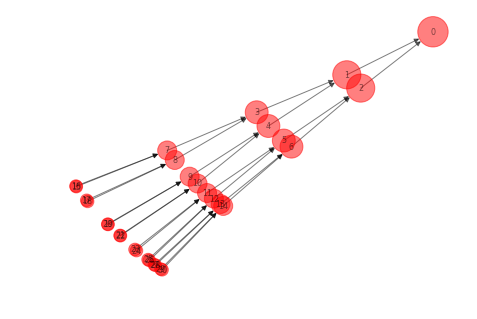

In [12]:
ns = [10000*G.nodes[n]['score'] for n in G.nodes]
nl = {n:n for n in G.nodes}

nx.draw_kamada_kawai(G, node_size=ns, labels=nl, font_size=8, alpha=.5)

In [13]:
nx.get_node_attributes(G,'self_wt')

{1: 1,
 0: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1}

In [14]:
nx.get_edge_attributes(G,'out_weight')

{(1, 0, 0): 0.5,
 (2, 0, 0): 0.5,
 (3, 1, 0): 0.5,
 (4, 1, 0): 0.5,
 (5, 2, 0): 0.5,
 (6, 2, 0): 0.5,
 (7, 3, 0): 0.5,
 (8, 3, 0): 0.5,
 (9, 4, 0): 0.5,
 (10, 4, 0): 0.5,
 (11, 5, 0): 0.5,
 (12, 5, 0): 0.5,
 (13, 6, 0): 0.5,
 (14, 6, 0): 0.5,
 (15, 7, 0): 0.5,
 (16, 7, 0): 0.5,
 (17, 8, 0): 0.5,
 (18, 8, 0): 0.5,
 (19, 9, 0): 0.5,
 (20, 9, 0): 0.5,
 (21, 10, 0): 0.5,
 (22, 10, 0): 0.5,
 (23, 11, 0): 0.5,
 (24, 11, 0): 0.5,
 (25, 12, 0): 0.5,
 (26, 12, 0): 0.5,
 (27, 13, 0): 0.5,
 (28, 13, 0): 0.5,
 (29, 14, 0): 0.5,
 (30, 14, 0): 0.5}

In [15]:
nx.get_edge_attributes(G,'in_weight')

{(1, 0, 0): 1,
 (2, 0, 0): 1,
 (3, 1, 0): 1,
 (4, 1, 0): 1,
 (5, 2, 0): 1,
 (6, 2, 0): 1,
 (7, 3, 0): 1,
 (8, 3, 0): 1,
 (9, 4, 0): 1,
 (10, 4, 0): 1,
 (11, 5, 0): 1,
 (12, 5, 0): 1,
 (13, 6, 0): 1,
 (14, 6, 0): 1,
 (15, 7, 0): 1,
 (16, 7, 0): 1,
 (17, 8, 0): 1,
 (18, 8, 0): 1,
 (19, 9, 0): 1,
 (20, 9, 0): 1,
 (21, 10, 0): 1,
 (22, 10, 0): 1,
 (23, 11, 0): 1,
 (24, 11, 0): 1,
 (25, 12, 0): 1,
 (26, 12, 0): 1,
 (27, 13, 0): 1,
 (28, 13, 0): 1,
 (29, 14, 0): 1,
 (30, 14, 0): 1}

In [16]:
nx.get_node_attributes(G,'total_wt')

{1: 3.0,
 0: 2.0,
 2: 3.0,
 3: 3.0,
 4: 3.0,
 5: 3.0,
 6: 3.0,
 7: 3.0,
 8: 3.0,
 9: 3.0,
 10: 3.0,
 11: 3.0,
 12: 3.0,
 13: 3.0,
 14: 3.0,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 2,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 24: 2,
 25: 2,
 26: 2,
 27: 2,
 28: 2,
 29: 2,
 30: 2}